In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns

In [2]:
loanData = pd.read_csv("LoanData.csv")

In [4]:
loanData = loanData.dropna()

In [5]:
loanData_train, loanData_test = train_test_split(loanData, test_size=0.3, stratify=loanData['Loan_Status'], random_state=42)
print(loanData_train.shape, loanData_test.shape)

(336, 13) (144, 13)


In [25]:
features= ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(loanData_train[features], loanData_train['LoanAmount'])

DecisionTreeRegressor(max_depth=4)

In [26]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [27]:
predictionsOnTrainset = dt.predict(loanData_train[features])
predictionsOnTestset = dt.predict(loanData_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, loanData_train.LoanAmount)
rmseTest = calculate_rmse(predictionsOnTestset, loanData_test.LoanAmount)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 43.56441062327028
RMSE on test set 72.85891908635892


In [28]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

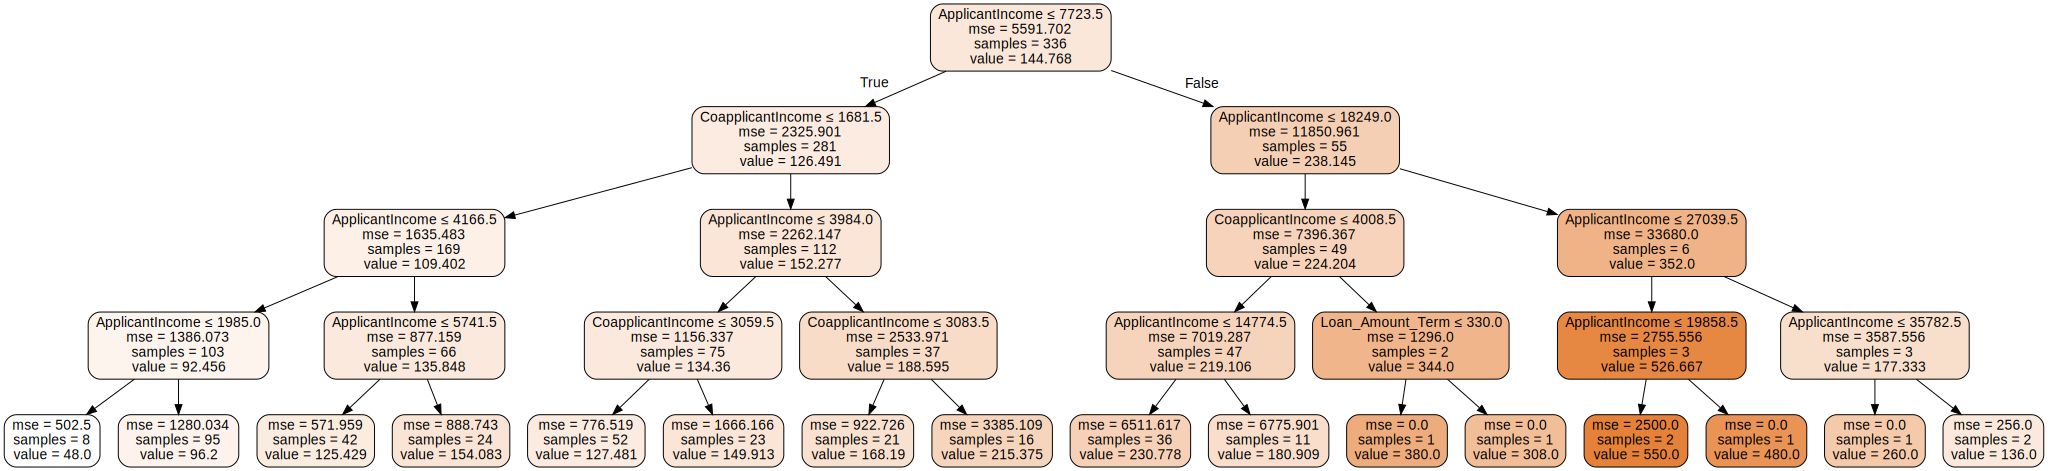

In [29]:
plot_tree_regression(dt, features)